# Appointments with no-show patients
## Project :: Investigating a Data Set
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

> In this project I am using the ** No-Show Appointment Dataset** to analyse and answer some question using this dataset. These questions are:
>
> **1) Does age (younger or older) have any kind of impact or relationship in terms of people showing up for appointments or not?**
>
> **2) Does the combination of age and scholarship have some kind of impact or relationship in terms of people showing up for appointments or not?**
>

In [1]:
'''Importing all the important packages'''

import pandas as pd # For working with dataset
import numpy as np # For working with numerical data
import matplotlib.pyplot as plt
import seaborn as sns #For better visualisation
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> When I tried to read this csv file I found an error :
> **“UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 3: invalid continuation byte”.**
> To solve this issue I used `encoding='latin-1'` in our code while reading this csv file.

### General Properties
> Loading this data set as df as it is short for use and also relates with term dataframe. The **df** contains all the dataset as availabe in the raw data set.

In [2]:
df = pd.read_csv('F:\\Github_repo\\Data-Analyst-Investigate-Dataset\\Data_set.csv', encoding='latin-1')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Performing Data Cleaning operation


> Taking a closer look at some aspects of the data from the above dataframes.
> The following few cells of code in this section are looking into the maximum listed age of 115.
> First create a sub-group of 'appt' dataframe where 'Age' column values are equal to '115'.

In [5]:
age_max= df.query("Age == 115")
age_max

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.200000e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.200000e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.200000e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.200000e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.480000e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SíO JOSí,0,1,0,0,0,1,No


In [6]:
age_max['PatientId'].nunique()

2

In [7]:
age_min= df.query("Age == -1")
df.Age.replace([-1],[0], inplace = True)

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (single variable exploration): 
> **Does age (younger or older) have any kind of impact/ relationship in terms of people showing up for appointments or not?**
>
> In order to explore the above question I'm creating a copy of the 'df' dataframe to the 'df_new' name.
>
> Now, using the 'df_new' dataframe, I'm creating a boxplot and using column "Age"  as the x-axis and "No-show" for the y-axis.

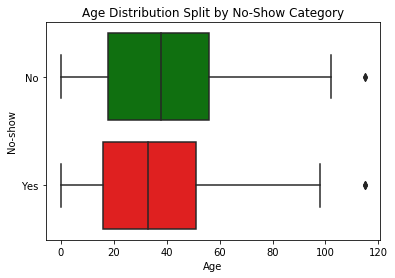

In [10]:
df_new= df
sns.boxplot(x="Age", y="No-show", palette=["g", "r"], data=df_new).set_title('Age Distribution Split by No-Show Category');

### Research Question 2 (multi-variable exploration):
>> **Does the combination of age and scholarship have any impact/ relationship with people showing up for appointments or not?**

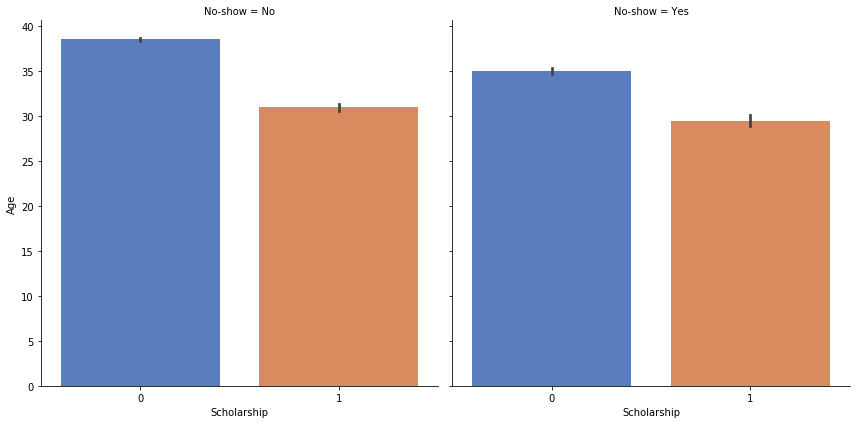

In [11]:
sns.catplot(x="Scholarship", y="Age", col="No-show", data=df_new, height=6, kind="bar", palette="muted");

<a id='conclusions'></a>
## Conclusions


> 1) Overall, there wasn't a huge difference in age for those who did or didn't show up to appointments. But I believe that the difference would have been higher for the group who did present for appointments rather that nearly 4 times larger than the group of people who aren't present for their appointments.
> 
> 2) While the age differences aren't very wide, the people who didn't show up to appointments tended to be younger and that is also the same for whether or not these 2 groups of people had healthcare scholarships. Also there is a fact that the **No-show=Yes** group is nearly 4 times smaller than the other group.
> 
> 3) Overall, after performing all the task I can conclude that there is not perfect evidence that either Age or Scholarship status have an strong relationship with people who were present for their appointment or not. Smaller number of people who were present for their appointments than who weren't might also can be a reason for this result.


In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295